<a href="https://colab.research.google.com/github/Midhilesh29/pytorch-learning/blob/master/FMNIST%2BCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader

**Model Architecture**

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super().__init__()

    self.feature = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6,kernel_size=5), #input (1,32,32), output (6,28,28) formula [32-5]+1=28
        nn.BatchNorm2d(num_features=6),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2), #input(6,28,28) output (6,14,14)

        nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5), #input(6,14,14) output (16,10,10) formula [14-5]+1
        nn.BatchNorm2d(num_features=16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2) #input(16,10,10) output(16,5,5)
    )

    self.classifier = nn.Sequential(
        nn.Linear(in_features=16*5*5, out_features=512),
        nn.ReLU(),

        nn.Linear(in_features=512,out_features=128),
        nn.ReLU(),

        nn.Linear(128,10)
    )
  def forward(self,x):
    x = self.feature(x)
    x = x.view(x.shape[0],-1)
    x = self.classifier(x)
    return x

**Datasets and Data Loaders**

In [ ]:
Transform = transforms.Compose([
                                transforms.Resize((32,32)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.2860),(0.3530))
                                ])
train_dataset = datasets.FashionMNIST('/content',train=True,transform=Transform,download=True)
test_dataset = datasets.FashionMNIST('/content',train=False,download=True,transform=Transform)

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw


Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw


Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [ ]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32)

**Function for training and testing**

In [ ]:
def train(criterion,optimizer):
  total_loss = 0
  total_accuracy = 0
  for image,label in train_loader:
    image = image.to('cuda')
    label = label.to('cuda')

    logit = Model(image)
    loss = criterion(logit,label)
    total_loss+=loss.item()

    prob = nn.functional.softmax(logit,dim=1)
    y_pred = prob.argmax(1)

    accuracy = torch.sum(y_pred==label)
    total_accuracy+=accuracy.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return total_loss/len(train_loader),total_accuracy/len(train_loader.dataset)

In [ ]:
def test(criterion):
  total_loss = 0
  total_accuracy = 0

  for image,label in test_loader:
    image = image.to('cuda')
    label = label.to('cuda')

    logit = Model(image)
    loss = criterion(logit,label)
    total_loss+=loss.item()

    prob = nn.functional.softmax(logit,dim=1)
    y_pred = prob.argmax(1)
    accuracy = torch.sum(y_pred==label)
    total_accuracy+=accuracy.item()

  return total_loss/len(test_loader),total_accuracy/len(test_loader.dataset)

In [ ]:
epochs =10

In [ ]:
Model = LeNet().to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Model.parameters(),lr=1e-5)

In [ ]:
epoch_train_loss=[]
epoch_train_accuracy=[]
epoch_test_loss=[]
epoch_test_accuracy=[]
for epoch in range(epochs):
  train_loss,train_accuracy = train(criterion,optimizer)
  test_loss,test_accuracy = test(criterion)

  epoch_train_loss.append(train_loss)
  epoch_train_accuracy.append(train_accuracy)
  epoch_test_loss.append(test_loss)
  epoch_test_accuracy.append(test_accuracy)

  print(f"Epoch: {epoch}|TrainLoss: {train_loss}|TrainAccuracy: {train_accuracy}|TestLoss: {test_loss}|TestAccuracy: {test_accuracy}")

Epoch: 0|TrainLoss: 1.2072296299616496|TrainAccuracy: 0.66295|TestLoss: 0.7034747424407508|TestAccuracy: 0.7508
Epoch: 1|TrainLoss: 0.6140361073652904|TrainAccuracy: 0.77835|TestLoss: 0.5790269375799563|TestAccuracy: 0.7833
Epoch: 2|TrainLoss: 0.5314586308240891|TrainAccuracy: 0.80545|TestLoss: 0.5230212378235289|TestAccuracy: 0.8065
Epoch: 3|TrainLoss: 0.486846711508433|TrainAccuracy: 0.8235166666666667|TestLoss: 0.488633114070938|TestAccuracy: 0.8228
Epoch: 4|TrainLoss: 0.4566598217089971|TrainAccuracy: 0.8355166666666667|TestLoss: 0.4637855816001709|TestAccuracy: 0.8336
Epoch: 5|TrainLoss: 0.43459669160048164|TrainAccuracy: 0.8435166666666667|TestLoss: 0.44529580312986344|TestAccuracy: 0.8388
Epoch: 6|TrainLoss: 0.417097883228461|TrainAccuracy: 0.85075|TestLoss: 0.43189041197490385|TestAccuracy: 0.8474
Epoch: 7|TrainLoss: 0.4030453267534574|TrainAccuracy: 0.8550333333333333|TestLoss: 0.4202976484363452|TestAccuracy: 0.8498
Epoch: 8|TrainLoss: 0.39250706600348156|TrainAccuracy: 0.859

In [ ]:
#Loss=[]
# SGD plain
# SGD with momentum
# RMSPROP
# RMSPROP with momentum
# ADAM

In [ ]:
Loss.append(epoch_train_loss)

**Analysing Different optimizers**

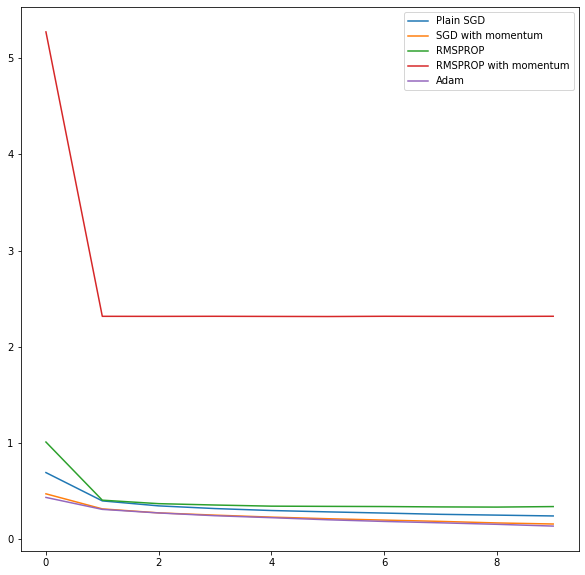

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(Loss[0],label="Plain SGD")
plt.plot(Loss[1],label="SGD with momentum")
plt.plot(Loss[2],label="RMSPROP")
plt.plot(Loss[3],label="RMSPROP with momentum")
plt.plot(Loss[4],label="Adam")
plt.legend()
plt.show()

**Adam >= SGD with momentum > Plain SGD > RMSPROP > RMSPROP with momentum**

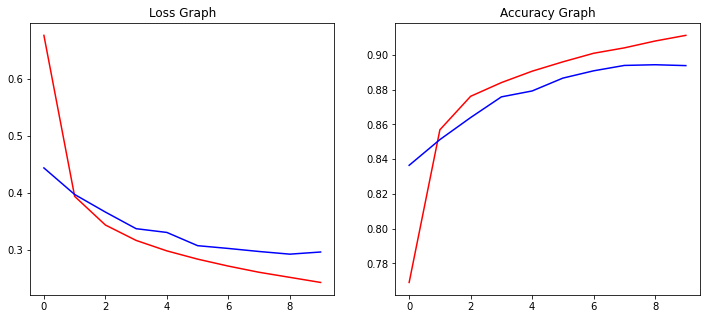

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Loss Graph")
plt.plot(epoch_train_loss,'r')
plt.plot(epoch_test_loss,'b')
plt.subplot(122)
plt.title("Accuracy Graph")
plt.plot(epoch_train_accuracy,'r')
plt.plot(epoch_test_accuracy,'b')
plt.show()

Predicted class: Shirt with probability: 0.51156085729599


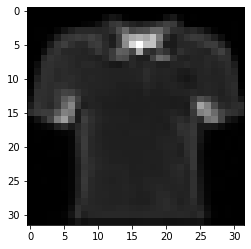



Predicted class: Sneaker with probability: 0.987576961517334


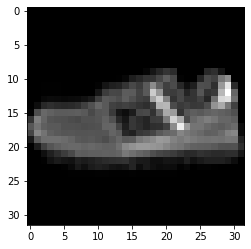



Predicted class: Trouser with probability: 0.9999589920043945


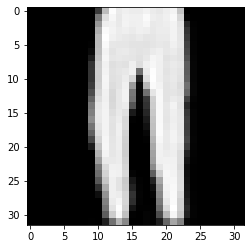



Predicted class: Bag with probability: 0.9973811507225037


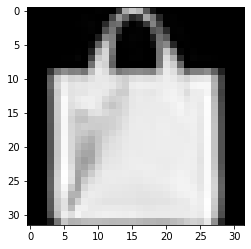



Predicted class: Bag with probability: 0.9996395111083984


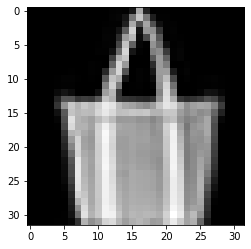



Predicted class: Ankle boot with probability: 0.9989830851554871


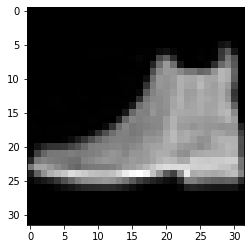



Predicted class: Ankle boot with probability: 0.6490719318389893


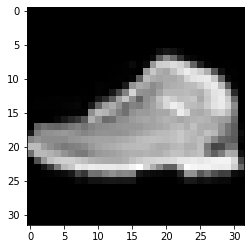



Predicted class: Ankle boot with probability: 0.9994874000549316


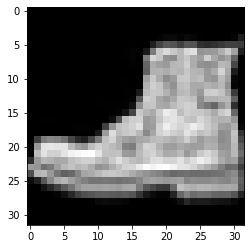



Predicted class: Pullover with probability: 0.7905336022377014


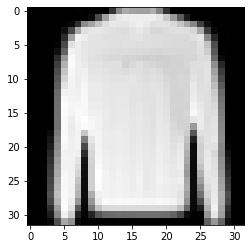



Predicted class: Bag with probability: 0.9998130202293396


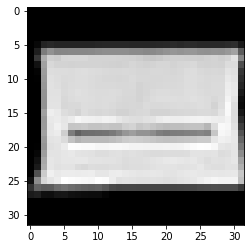

In [ ]:
infer_loader = DataLoader(test_dataset,batch_size=10,shuffle=True)
classes = {0:"T-shirt/Top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
for image,label in infer_loader:
  image = image.to('cuda')
  label = label.to('cuda')
  logit = Model(image)
  prob = nn.functional.softmax(logit,dim=1)
  p,y_pred = prob.max(1)
  for i in range(image.shape[0]):
    print(f"Predicted class: {classes[y_pred[i].item()]} with probability: {p[i]}")
    plt.imshow(image[i].reshape(32,32).cpu(),cmap="gray")
    plt.show()
    print("\n")
  break